# Context:

    DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. 
    They are tasked with coming up with a policy framework by looking at the data government got from WHO. 
    You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

##  Problem:
**The dataset aims to answer the following key questions:**

**What are the different factors that influence the income of an individual?**

**Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?**

### Data Dictionary

- age: continuous - age of a Person
- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: no. of years a person studied - continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Investment gain of the person other than salary - continuous
- capital-loss: Loss from investments - continuous
- hours-per-week: No. of hours a person works - continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, - - Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

## Importing required libraries

In [1]:
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install missingno  

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics  import r2_score,f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [4]:
# reading the file 
data = pd.read_csv('who_data.csv')

In [5]:
#assigning a copy of the data set to df
df = data.copy()

In [6]:
#check the size of the data set
data.shape

(32561, 15)

In [7]:
#check the head of the provided data
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#check for samples of the values in the dataset
data.sample(6)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
23188,30,Private,29235,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,20,United-States,<=50K
2841,45,Local-gov,132563,Prof-school,15,Divorced,Prof-specialty,Unmarried,Black,Female,0,1726,40,United-States,<=50K
2532,18,Local-gov,134935,12th,8,Never-married,Protective-serv,Own-child,White,Male,0,0,40,United-States,<=50K
18102,56,Private,178033,Some-college,10,Widowed,Exec-managerial,Not-in-family,White,Male,4416,0,60,United-States,<=50K
10702,22,Private,215546,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
15251,53,Private,209906,1st-4th,2,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,35,Puerto-Rico,<=50K


In [9]:
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
#check for the data type of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [12]:
#check for duplicates in the data set
data.duplicated().sum()

24

In [13]:
#check for null values in the data set
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [14]:
#check for the summary of the dataset
data.describe(include='all')

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- From the above it can be concluded that there are 14 columns and 32561 row in the data set
- There are 6 columns that are integer and 8 object type which correspond the values in the columns.
- There 24 duplicated variarbles in the data set which will be dropped.
- There are no null values in the data set.

## Data Cleaning 

In [15]:
# replacing the salary values with 1 and 0
# df['salary'] = df['salary'].replace({'<=50K':1,'>50K':0})
# Delta_data['salary'] = Delta_data['salary'].replace({' <=50K': 0, ' >50K': 1})

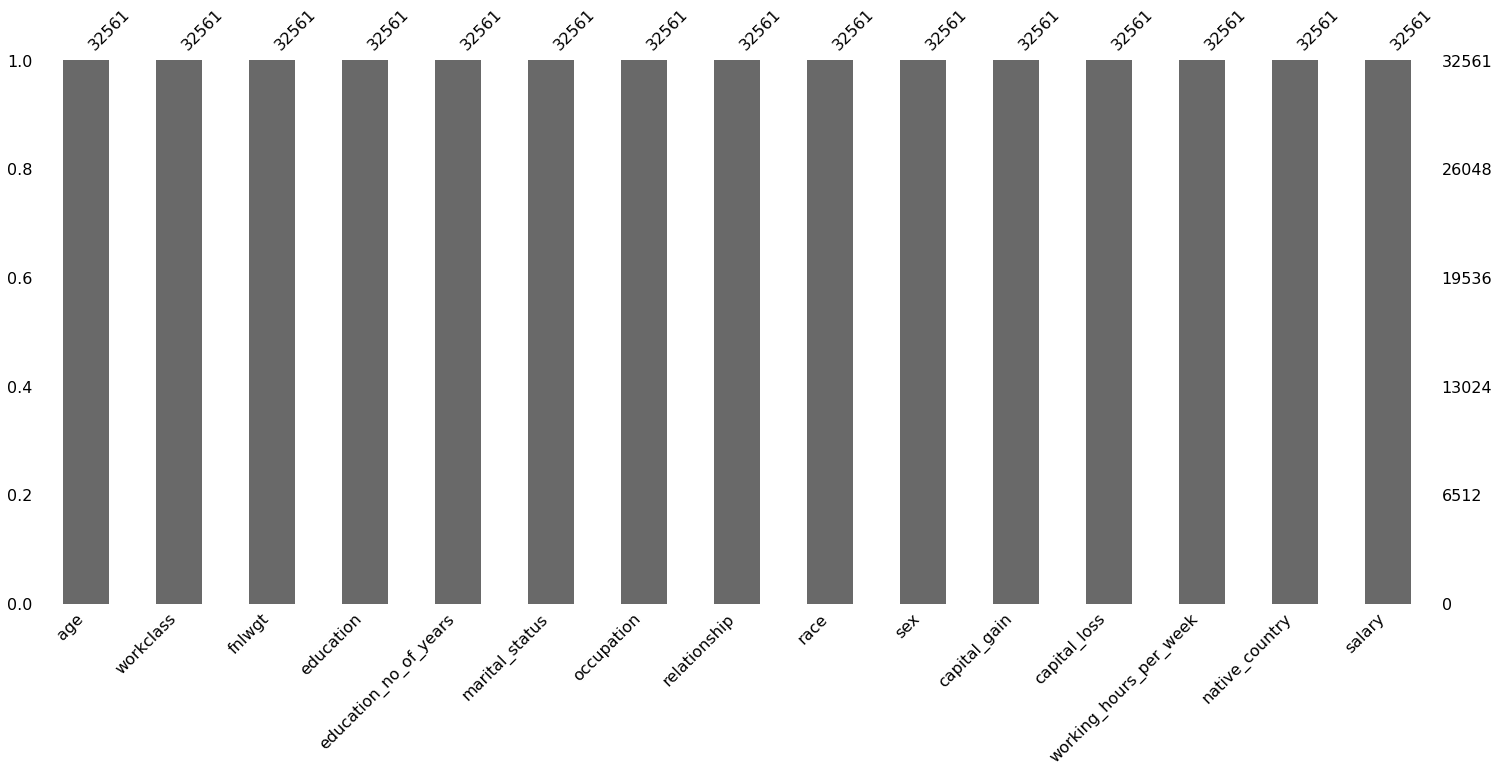

In [16]:
#check for missing values
import missingno as msno
msno.bar(df);

In [17]:
# fucnction for replacing the salary values with 1 and 0
def change_salary(value):
    if value == ' <=50K':
        value = 1
    else:
        value = 0
    return value

In [18]:
#applying the defined function for changing the values of the salary income
df['salary']= df['salary'].apply(change_salary)

In [19]:
df['salary'].value_counts()

1    24720
0     7841
Name: salary, dtype: int64

In [20]:
# dropping the duplicated values in the data
df.drop_duplicates(inplace= True)

In [21]:
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


- The values of the salary with <=50K are changed to 1 and >50K are changed to 0
- The duplicated values are dropped .

In [22]:
#checking if bothe workclass and ocupation
df[(df['workclass']==' ?')& (df['occupation']==' ?')]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,1
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,1
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,1
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,0
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,1
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,0
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,1


In [23]:
#changing the rows with ? to others
df['workclass'] =df['workclass'].replace({' ?':"others "})

In [24]:
#changing the rows with ? to others
df['occupation'] =df['occupation'].replace({' ?':"others "})

In [25]:
#check if the changes took place
df[df['workclass']==' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


In [26]:
#check if the changes took place
df[df['occupation']==' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary


## Data Visualization

### Univariate

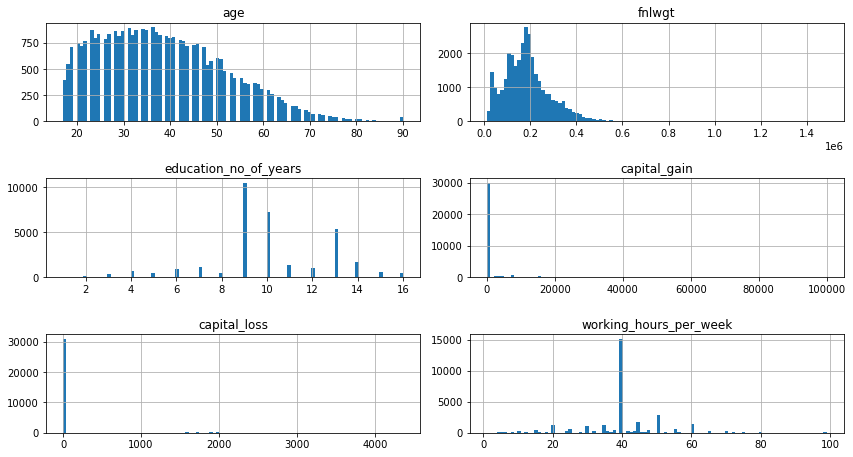

In [27]:
columns = list(df)[:-1]
df[columns].hist(stacked = False, bins = 100, figsize=(12,30), layout=(14,2));
plt.tight_layout();

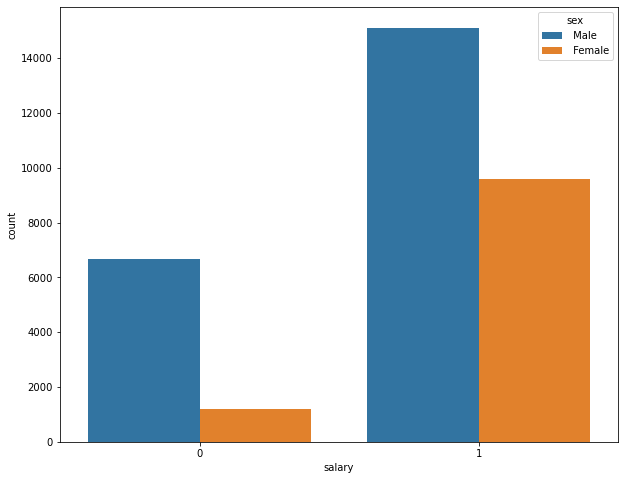

In [28]:
plt.figure(figsize=(10,8));
sns.countplot(df,hue = 'sex',x = 'salary');

Text(0.5, 1.0, 'DISTRIBUTION OF AGE ')

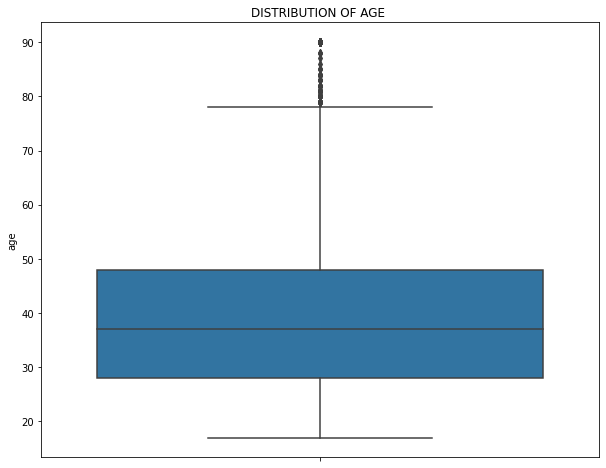

In [29]:
plt.figure(figsize=(10,8));
sns.boxplot(df,y='age');
plt.title('DISTRIBUTION OF AGE ')

Text(0.5, 1.0, 'DISTRIBUTION OF MARITAL STATUS ')

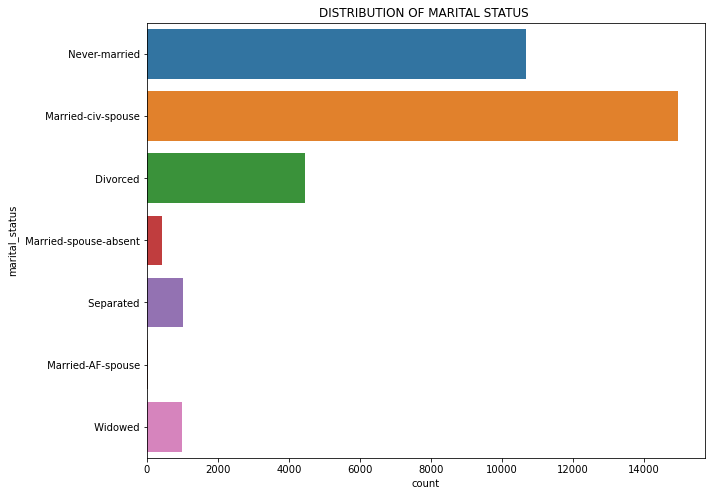

In [30]:
plt.figure(figsize=(10,8));
sns.countplot(df,y='marital_status');
plt.title('DISTRIBUTION OF MARITAL STATUS ')

**Obsevation**
- From the age distribution it can be deduced that the population have more people within the age range of 20-50 and less people who have age greater than 
- From the marital status distribution it can be deduced that married people in the dataset is the highest than never married and the others 

<AxesSubplot:ylabel='working_hours_per_week'>

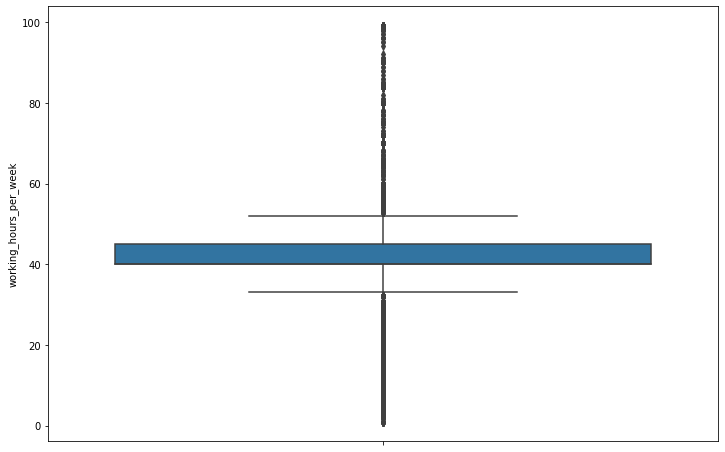

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(df, y='working_hours_per_week')

Text(0.5, 1.0, 'Distribution of Work Class')

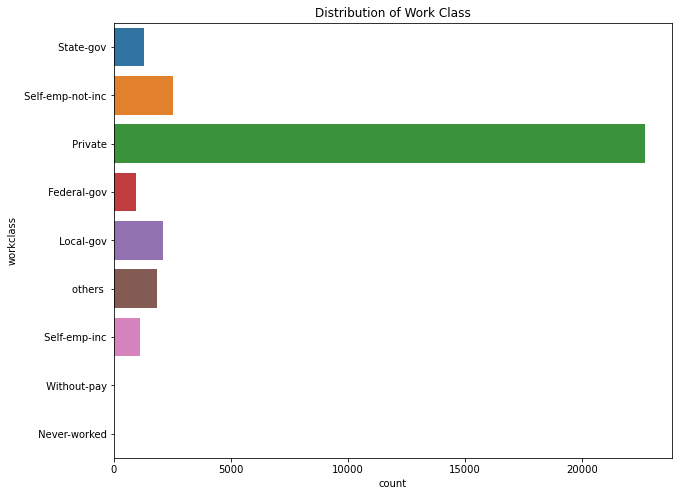

In [32]:
plt.figure(figsize=(10,8));
sns.countplot(df, y='workclass');
plt.title('Distribution of Work Class')

** OBSERVATION**

### Bivariate

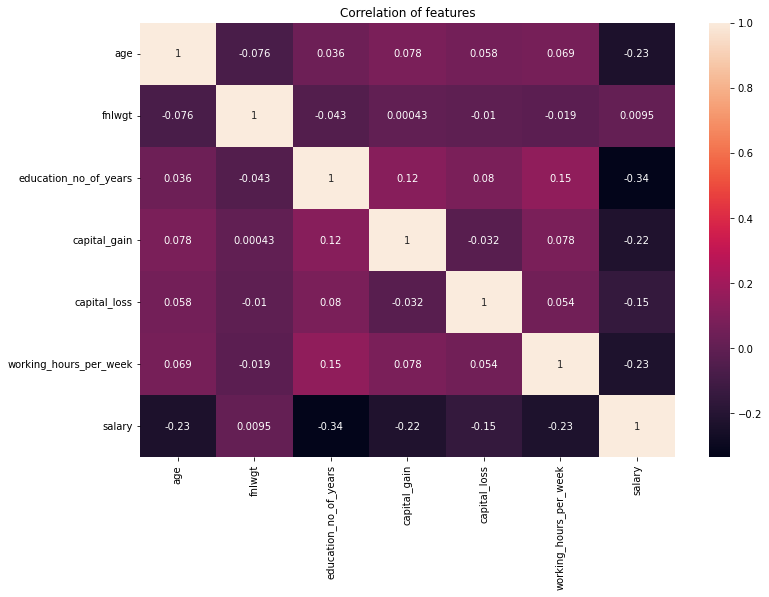

In [33]:
#check for correlation
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation of features');


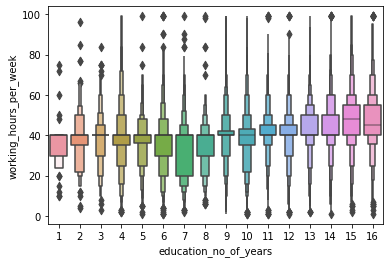

In [34]:
sns.boxenplot(df, y= 'working_hours_per_week', x='education_no_of_years');

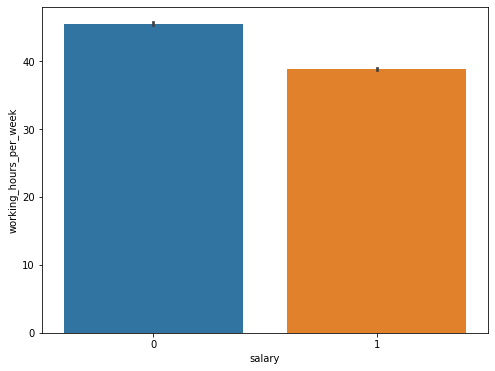

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(df, y= 'working_hours_per_week', x='salary');

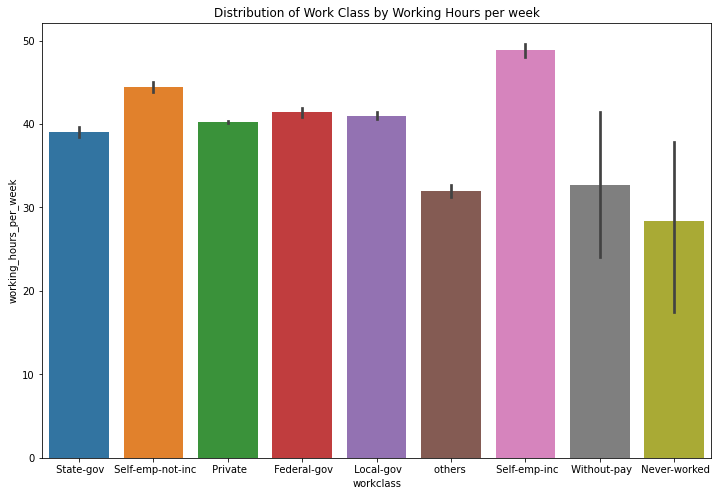

In [87]:
plt.figure(figsize=(12,8))
sns.barplot(df, x= 'workclass', y='working_hours_per_week');
plt.title('Distribution of Work Class by Working Hours per week',fontsize=12 );

<AxesSubplot:xlabel='working_hours_per_week', ylabel='sex'>

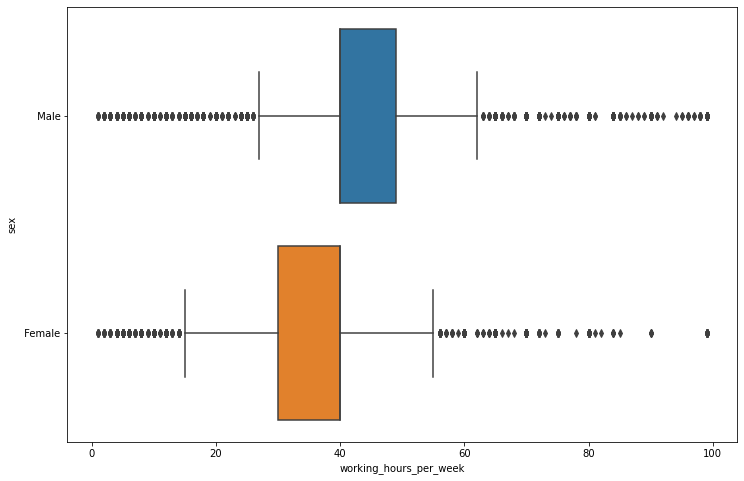

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(df, y= 'sex', x='working_hours_per_week')

<AxesSubplot:xlabel='working_hours_per_week', ylabel='education'>

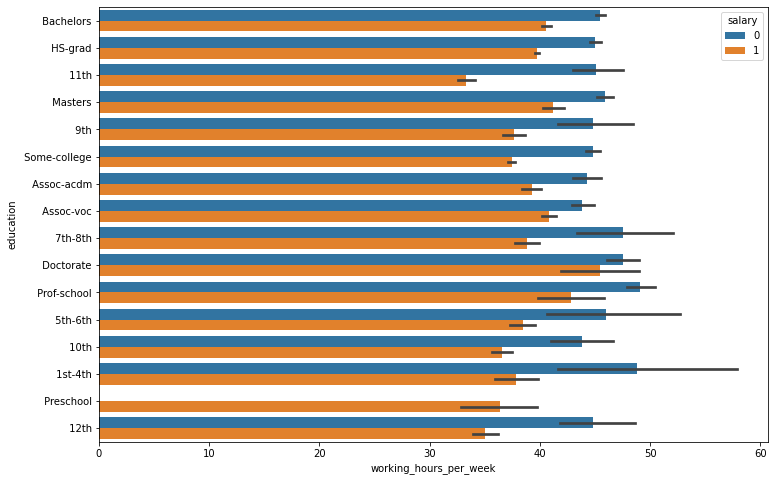

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(df, y= 'education', x='working_hours_per_week')

### Seleting Features and target

In [39]:
#dropping the features
X= df.drop(['salary','race', 'relationship',
            'native_country',
            'education_no_of_years',
            'occupation','workclass'],axis=1)
y = df['salary']

In [40]:
X=pd.get_dummies(X,drop_first=True)

In [41]:
X.shape

(32537, 27)

In [42]:
y.value_counts()

1    24698
0     7839
Name: salary, dtype: int64

## Spliting data
We will use 80% of data for training and 20% for testing.

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, stratify=y, test_size=0.30)

## Logistic Regression

In [47]:
scaler = StandardScaler()



In [49]:

x_train_sc = scaler.fit_transform(x_train)

In [50]:
x_test_sc = scaler.transform(x_test)

In [51]:
#instance of the model 
log_reg = LogisticRegression(random_state=0)  

In [52]:
log_reg.fit(x_train_sc,y_train)

LogisticRegression(random_state=0)

In [53]:
#check for performance accuracy
print("Train Performance:{:.3f}".format(log_reg.score(x_train_sc,y_train)))
print("Test Performance:{:.3f}".format(log_reg.score(x_test_sc,y_test)))

Train Performance:0.844
Test Performance:0.839


## Training 

In [54]:
#functions to train a model and compute train accuracy
def train(model,X,y):
    """
    Function to train a model and compute accuracy
    model:Model algorithm not yet trained
    X:train features
    y:train target    
    """
    train_model = model.fit(X,y)  #training the model
    preds = train_model.predict(X)  #making predictions
    acc = accuracy_score(y,preds)   # computing  the accuracy
    print (f"Train Accuracy:{acc}")
    return train_model

In [55]:
log_reg_model = train(log_reg,x_train_sc,y_train)

Train Accuracy:0.84403951701427


In [58]:
test_preds = log_reg.predict(x_test_sc)
precision = precision_score(y_test,test_preds)

In [62]:
print("Test Precision Score :{:.3f}".format(precision))

Test Precision Score :0.868


In [56]:
#function to evalate the model and complete metrics on test data
def evaluate(model,X,y,threshold=0.5):
    """
    Funtion to evaluate train model with different metrics
    
    model:trained model(classifier)
    X:validation features
    y :target in validation
    
    threshold:the value to filter the prediction
    """
    pred_proba = model.predict_proba(X)[:,1]
    pred_class = np.round(pred_proba>threshold) # convert 0 or 1
    acc = accuracy_score(y,pred_class)
    recall = recall_score(y,pred_class)
    precision = precision_score(y,pred_class)
    f1 = f1_score(y,pred_class)
    
    #create dataframe for matrics
    df = pd.DataFrame({
        "Accuracy":acc,
        "Recall":recall,
        "Precision":precision,
        "F1":f1},index = [0])
    
    #compute confusion matrix
    conf = confusion_matrix (y,pred_class,labels = [0,1])     #labels indicate that there zero and 1 in the label
    disp = ConfusionMatrixDisplay(conf, display_labels = [0,1])  #create plot of the confusion matrix
    disp.plot()
    plt.show()
    return df

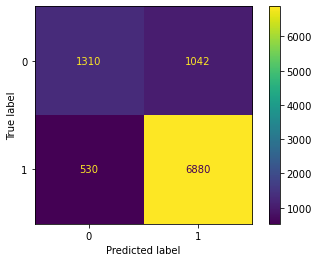

,Accuracy,Recall,Precision,F1
0,0.838967,0.928475,0.868468,0.897469


In [65]:
log_reg_df = evaluate(log_reg_model, x_test_sc,y_test)

log_reg_df

The confusion matrix

True Positives (TP): we correctly predicted 6880 to earn less 50k

True Negatives (TN): we correctly predicted that they don't earn more than 530

** observations**
- From the above graph it can be dued that there the model predicted that 6880 correctly to earn less tha 50k, and mistakely predicted 1024 to earn more than 50k,
- The model predicted 530 wrongly out of 7410 to earn less than 50k

## Model Improvement- Data

In [66]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [67]:
#importing neccessary library for improving data
from imblearn.over_sampling import ADASYN,SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [68]:
#function for balancing train  data
def balance_data(X,y,smote_type):
    """
    X: Train features
    y:train traget
    smote_type: kind of imbalance strategy
    """
    X_res,y_res = smote_type.fit_resample(X,y)
    return X_res, y_res

In [69]:
#instances of imbalance 
under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
adasyn = ADASYN(random_state=0)


In [71]:
x_train_un,y_train_un= balance_data(x_train,y_train,under)
x_train_ov,y_train_ov= balance_data(x_train,y_train,over)
x_train_sm,y_train_sm= balance_data(x_train,y_train,adasyn)
x_train_ada,y_train_ada= balance_data(x_train,y_train,smote)

Train Accuracy:0.63039912520503


C:\Users\693511\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


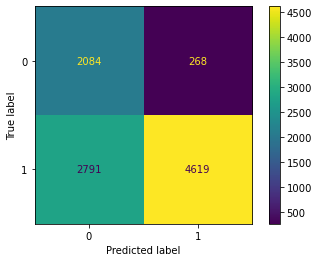

,Accuracy,Recall,Precision,F1
0,0.686642,0.623347,0.945161,0.75124


In [76]:
#rebuilding model
log_reg_un = train(log_reg, x_train_un,y_train_un)
#evaluating the model
df_un = evaluate(log_reg_un,x_test_sc,y_test)
df_un

Train Accuracy:0.6164391485423415


C:\Users\693511\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


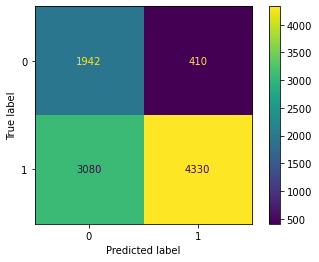

,Accuracy,Recall,Precision,F1
0,0.642491,0.584345,0.913502,0.712757


In [78]:
#rebuilding model
log_reg_ov = train(log_reg, x_train_ov,y_train_ov)
#evaluating the model
df_ov = evaluate(log_reg_ov,x_test_sc,y_test)
df_ov

Train Accuracy:0.7523698035632709


C:\Users\693511\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


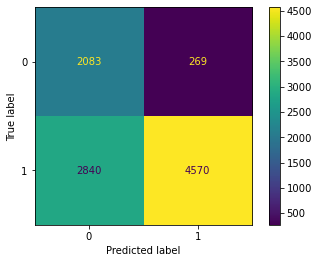

,Accuracy,Recall,Precision,F1
0,0.68152,0.616734,0.94441,0.746183


In [80]:
#rebuilding model
log_reg_sm = train(log_reg, x_train_sm,y_train_sm)
#evaluating the model
df_sm = evaluate(log_reg_sm,x_test_sc,y_test)
df_sm

Train Accuracy:0.6128817677001388


C:\Users\693511\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


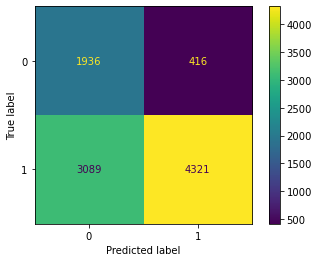

,Accuracy,Recall,Precision,F1
0,0.640955,0.583131,0.912181,0.711451


In [82]:
#rebuilding model
log_reg_ada = train(log_reg, x_train_ada,y_train_ada)
#evaluating the model
df_ada = evaluate(log_reg_ada,x_test_sc,y_test)
df_ada

** Recommendation **
1. It can be concluded from the didtribution of salary against work hour that the number of people who work more than 40 hours earn above 50k and the people who earn less than 50k work less 40 hours per week.So the government can encourage more working 
2. The distribution of work class and worked hours per week show that the self employed people work more hours than the others in the group which were not specified. The goverment  can engourage other sectors to work more hours
**Predictive model for income**
